In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/akirichenko/Downloads/amz_uk_price_prediction_dataset.csv")

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

# Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [17]:
frequency_table_all = df["category"].value_counts()
frequency_table = df["category"].value_counts()[0:5]

In [9]:
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

# Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: xlabel='category'>

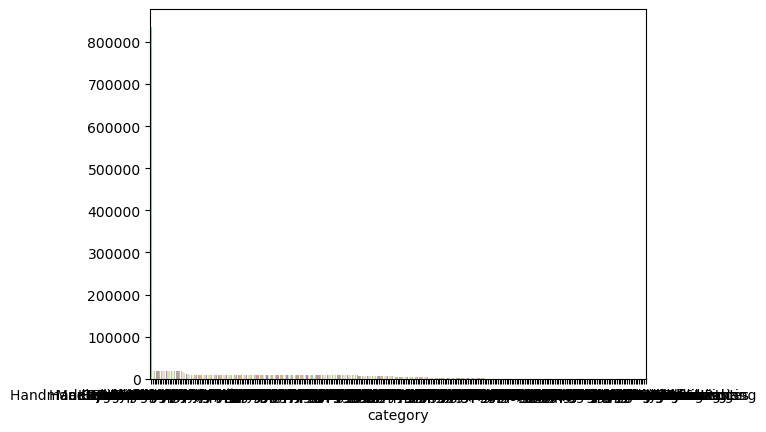

In [18]:
sns.barplot(x=frequency_table_all.index, y=frequency_table_all.values, palette="Set3")

<Axes: xlabel='category'>

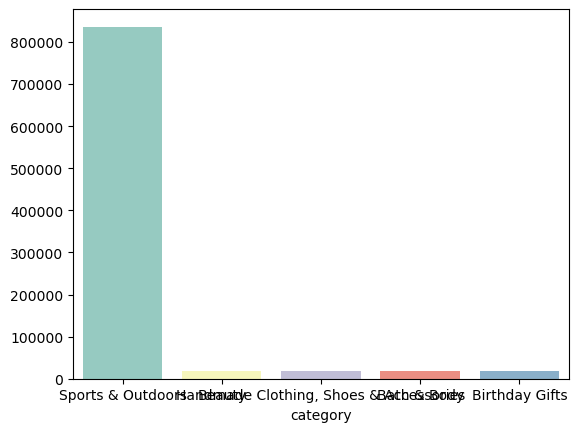

In [19]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")

([<matplotlib.patches.Wedge at 0x15986f010>,
 [Text(-1.0619894641325325, 0.2866677136886831, 'Sports & Outdoors'),
  Text(0.9852466974708041, -0.4891716928879616, 'Beauty'),
  Text(1.0412846831644893, -0.3545789173188805, 'Handmade Clothing, Shoes & Accessories'),
  Text(1.0788687885174035, -0.21457431617737963, 'Bath & Body'),
  Text(1.0976547688734235, -0.07179142267312413, 'Birthday Gifts')])

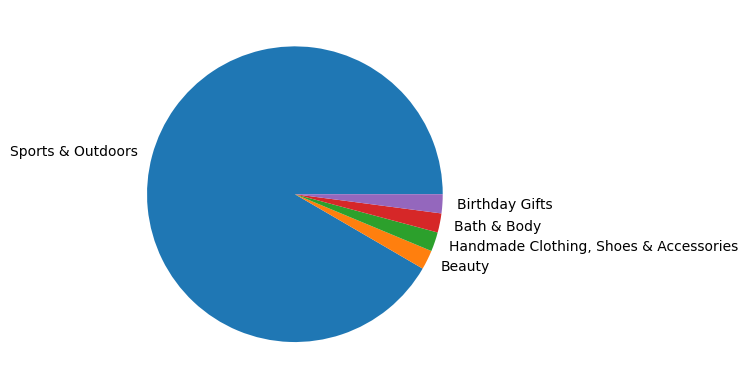

In [20]:
plt.pie(frequency_table.values, labels=frequency_table.index)

# Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [21]:
df.price.mean()

89.24380943923663

In [22]:
df.price.median()

19.09

In [23]:
df.price.mode()

0    9.99
Name: price, dtype: float64

The average price here is the median value, so 19.09GBP. It is higher than the modal value of 9.99GBP but it makes sense considering how positively skewed the data is.

# Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [25]:
df.price.var()

119445.48532256528

In [27]:
df.price.std()

345.60886175352226

In [30]:
range = df.price.max() - df.price.min()
print(range)

100000.0


In [31]:
quartiles = df.price.quantile([0, 0.25, 0.5, 0.75])
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]
print(IQR)

36.0


The product prices are extremely varied if you take into account the tail end of the data which skews it so high, but compared to it the non-outliers tend to be relatively close to one anouther with an IQR of only 36 as opposed to the standard deviation of 345.6 and a range of 10000.

# Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


(array([2.443482e+06, 1.560000e+02, 1.100000e+01, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

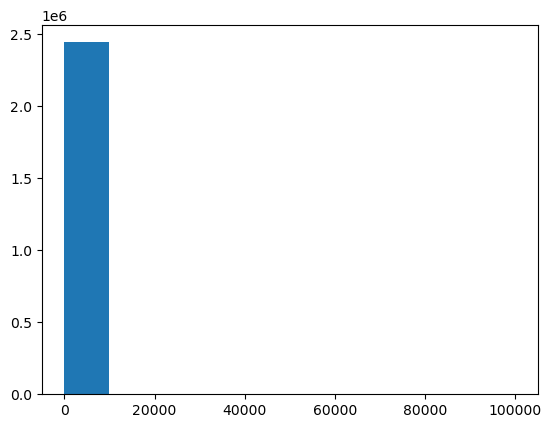

In [33]:
plt.hist(df.price, bins=10)

the data looks weird because it is extremely skewed. to get more accurate results you would plot this without the outliers, or maybe just plot what's in the interquartile range

{'whiskers': [<matplotlib.lines.Line2D at 0x159a5cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x159a5de50>,
 'boxes': [<matplotlib.lines.Line2D at 0x159901ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x159a5ef50>],
 'fliers': [<matplotlib.lines.Line2D at 0x159a5f750>],
 'means': []}

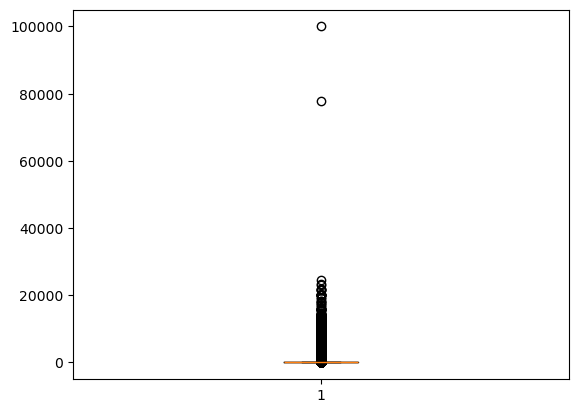

In [34]:
plt.boxplot(df.price)

lolmao

# Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [38]:
df.stars.mean()

2.152836472966065

In [44]:
df[df['stars'] != 0.0]['stars'].mean()

4.31916076222691

In [39]:
df.stars.median()

0.0

In [42]:
df[df['stars'] != 0.0]['stars'].median()

4.4

In [40]:
df.stars.mode()

0    0.0
Name: stars, dtype: float64

In [43]:
df[df['stars'] != 0.0]['stars'].mode()

0    4.5
Name: stars, dtype: float64

most products remain unrated, hence why the median and modal values equal to zero. From the actually reviewed products, the ratings tend to be quite high with the mean being 4.3 stars and the median and mode are 4.4 and 4.5 respectively.

# Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [50]:
df[df['stars'] != 0.0]['stars'].var()

0.3083433752380519

In [49]:
df[df['stars'] != 0.0]['stars'].std()

0.5552867504614637

In [51]:
quartiles = df[df['stars'] != 0.0]['stars'].quantile([0, 0.25, 0.5, 0.75])
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]
print(IQR)

0.5


for the actually rated products, the reviews tend to be concentrated in one area hence the values above this statement. It would be safe to say that the ratings are consistent.

# Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [52]:
df.stars.skew()

0.08120735761080985

In [53]:
df.stars.kurtosis()

-1.9260061280432985

The data has a negative kurtosis which means that it has shorter tails than a normal distribution, and with a skewness index of 0.08 it means that the data is slightly positively skewed, but it's very close to zero so it's almost symmetrical.

# Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: >

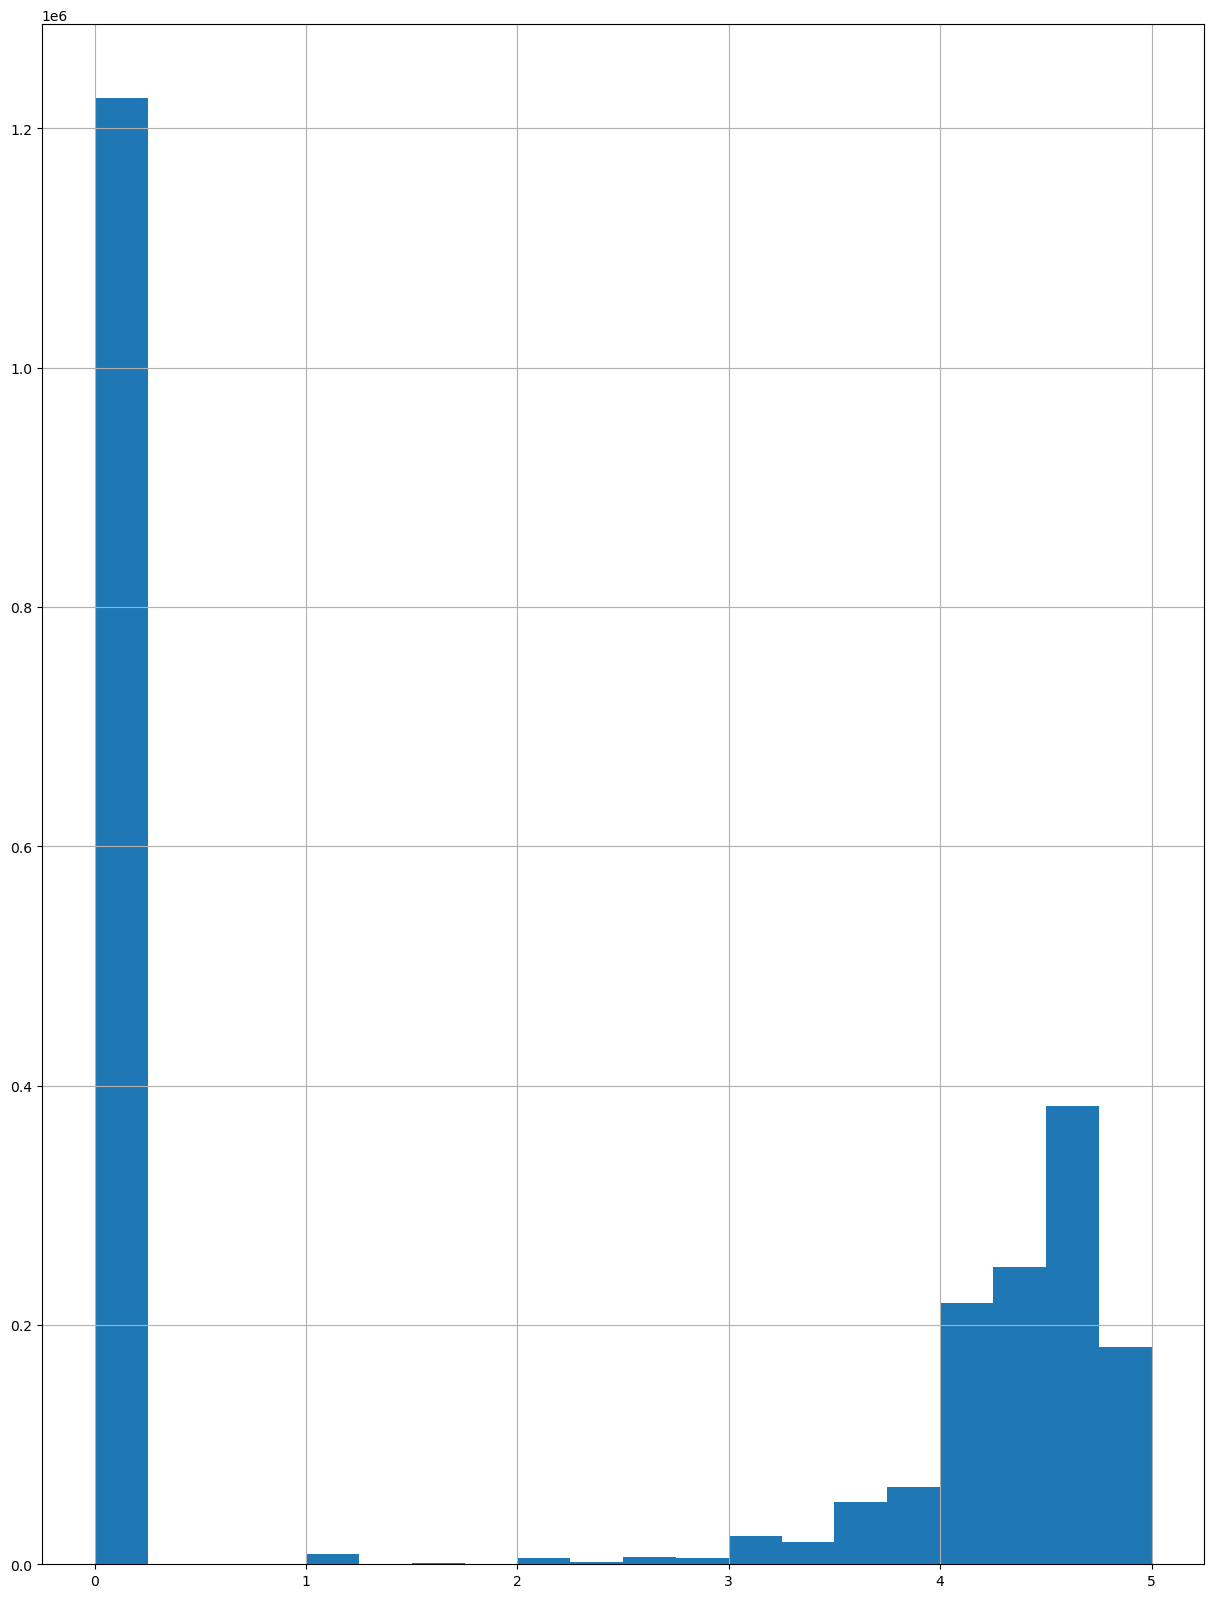

In [56]:
df.stars.hist(figsize=(15, 20), bins=20, xlabelsize=10, ylabelsize=10)

the most common value here is the one corresponding to unrated products. If you exclude it, the histogram would look like this: 

<Axes: >

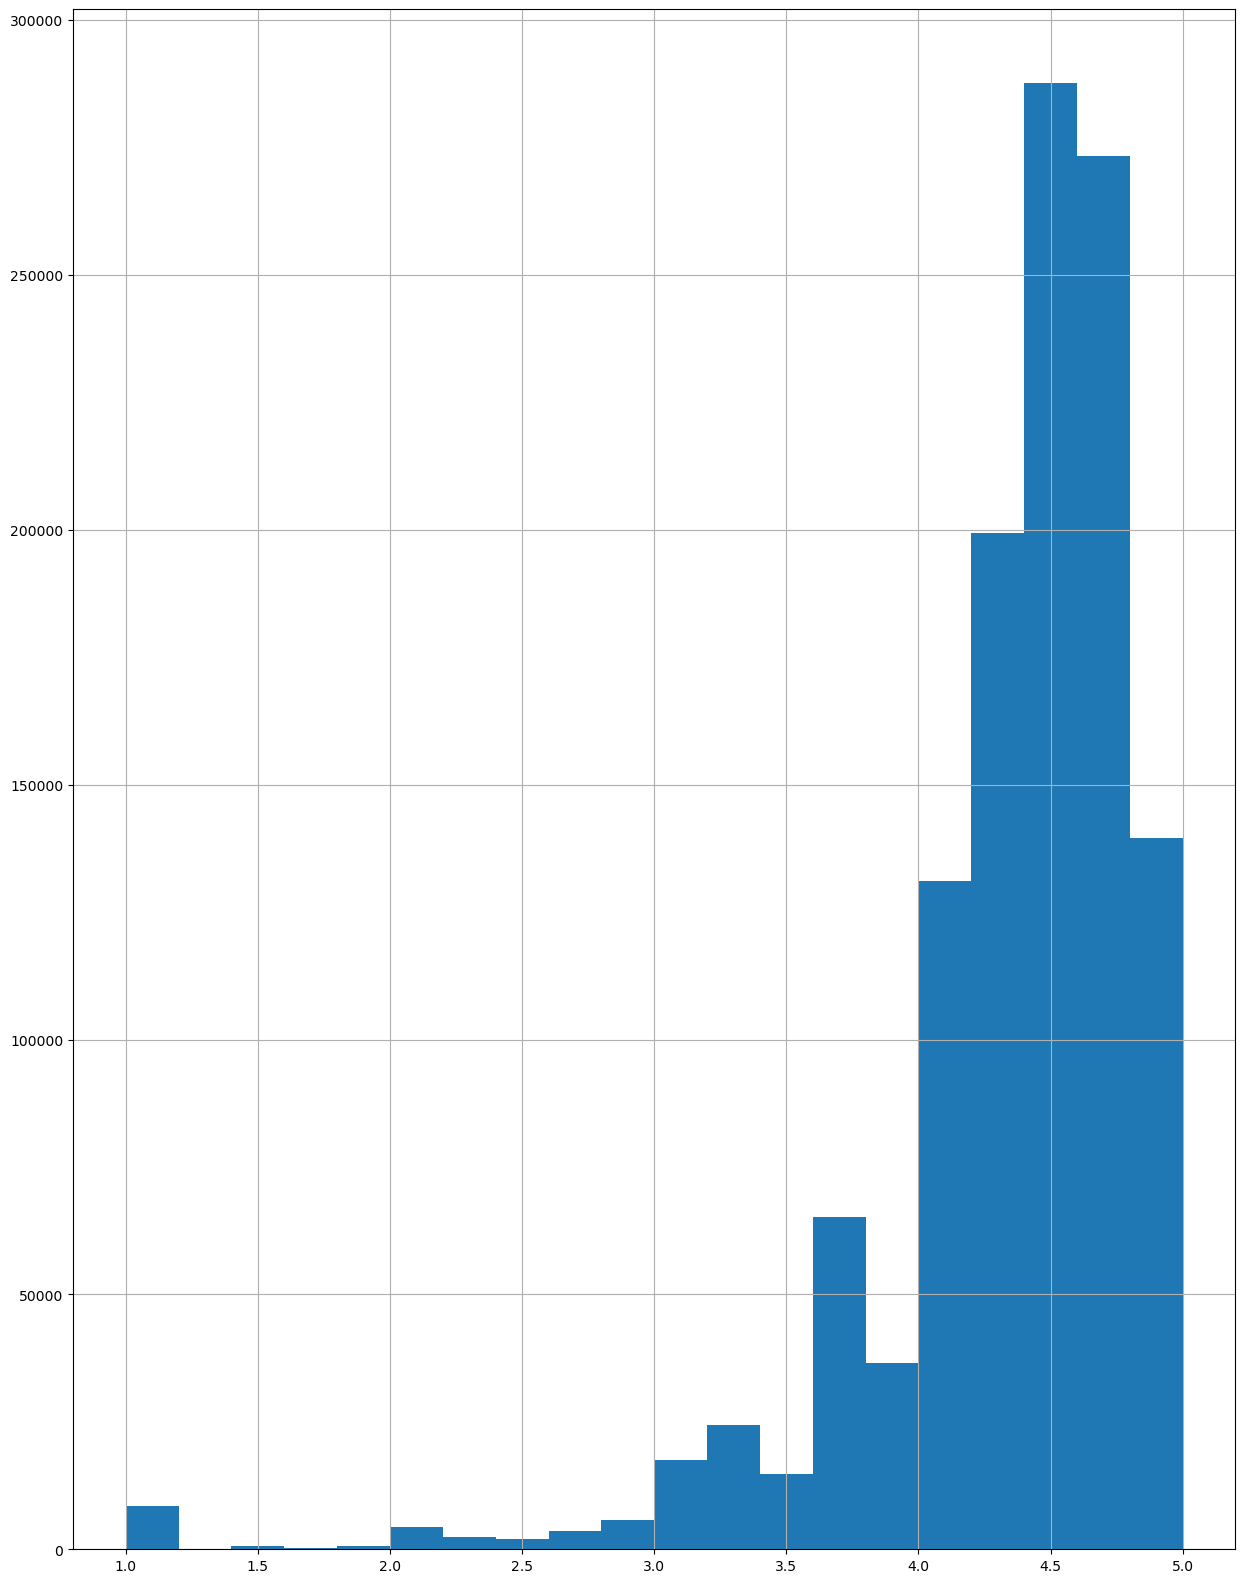

In [57]:
df[df["stars"] != 0].stars.hist(figsize=(15, 20), bins=20, xlabelsize=10, ylabelsize=10)

so we can conclude that the most common rating hovers around 4.5 stars. 